In [23]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm
import mean_shift as ms
import pylab
import os
import cv2
from PIL import Image

pylab.rcParams['figure.figsize'] = (10, 6)

In [2]:
def get_image_data(data):
    
    name = data[data.keys()[0]][0]
    fixs = data[data.keys()[3]][:]['fixations']
    tamps = data[data.keys()[3]][:]['timestamp']
    size = data[data.keys()[5]][0]
    loc = data[data.keys()[3]][:]['location']
    
    fixations=[]
    locations=[]
    timestamps=[]
    # Cleaning data to avoid errors when computing meanshift
    for i in range(0,len(loc)):
        if(fixs[i][0].shape[0]!=0):
            fixations.append(fixs[i][0])
            locations.append(loc[i][0])
            timestamps.append(tamps[i][0])
    
    
    return name, fixations, locations, timestamps, size

In [38]:
def plot_fixations(img_PATH,map_PATH,fixations):


    img = Image.open(img_PATH).convert("L")
    salmap = Image.open(map_PATH)

    fig1 = plt.figure()
    imgcolor=plt.imread(img_PATH)
    
    plt.imshow(imgcolor)

    for fix in range(0,20,4): #5 users only
        fig=plt.figure()

        ax = fig.add_subplot(1,1,1)
        ax.set_title('User '+str(fix))
        ax.imshow(img,cmap='gray')
        
        fig2=plt.figure()
        ax1 = fig2.add_subplot(1,1,1)
        ax1.set_title('Salmap User '+ str(fix))
        ax1.imshow(salmap)
        
        for i, pos in enumerate(fixations[fix]):
            ax.annotate(i, (pos[0],pos[1]),color='r')
            ax.scatter(pos[0], pos[1], color='g')
            ax1.annotate(i, (pos[0],pos[1]),color='r')
            ax1.scatter(pos[0], pos[1], color='g')

        for x,y in fixations[fix]:
            ax.scatter(x, y, color='y')
            ax1.scatter(x, y, color='y')

        ax.set_xlabel('x')
        ax.set_ylabel('y')
        
        ax1.set_xlabel('x')
        ax1.set_ylabel('y')
        
        fig.savefig("Plots/SALICON/fixations_salicon_"+str(fix)+'_'+os.path.basename(img_PATH))
        fig2.savefig("Plots/SALICON/fix_map_salicon_"+str(fix)+'_'+os.path.basename(img_PATH))





In [4]:
# Folders
TRAIN_FOLDER = '../../Datasets/SALICON/SALICON_fixations/train/'
TRAIN_MAPS_PATH='../../Datasets/SALICON/maps/train/'
SALICON_PATH = '../../Datasets/SALICON/SALICON_train_val/'


Plots of ordered fixation points in SALICON dataset:

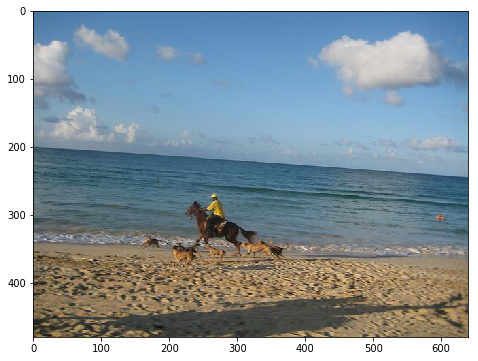

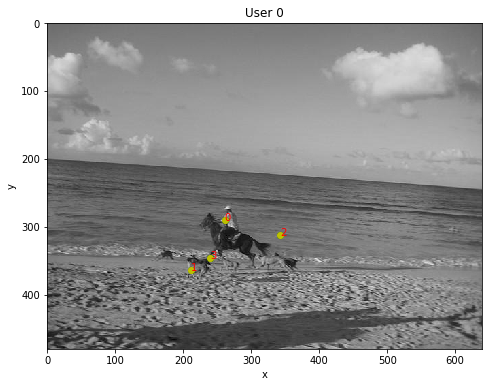

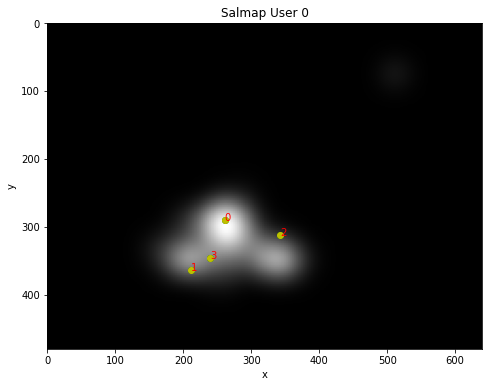

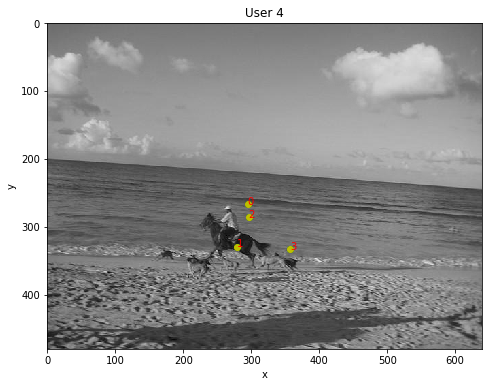

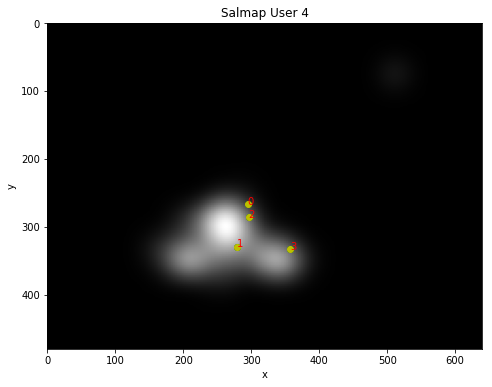

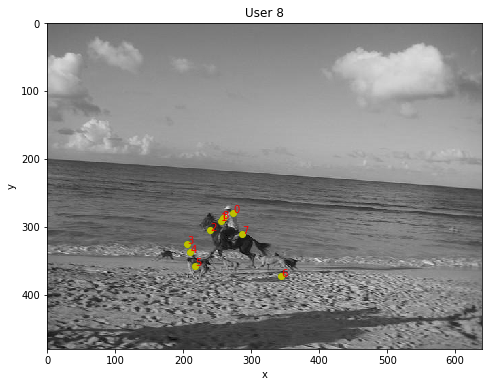

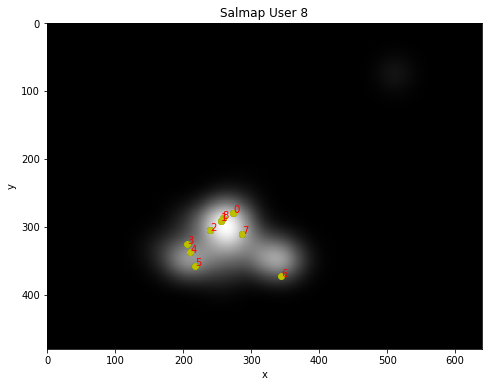

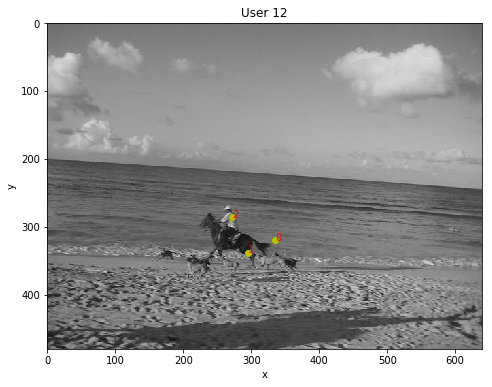

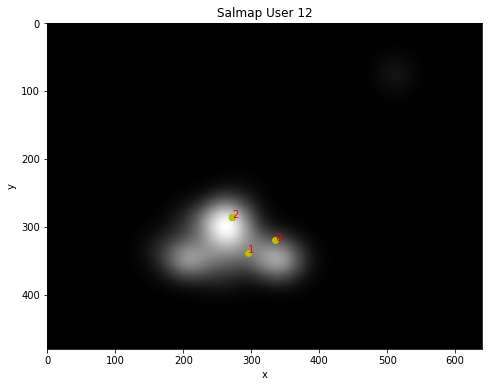

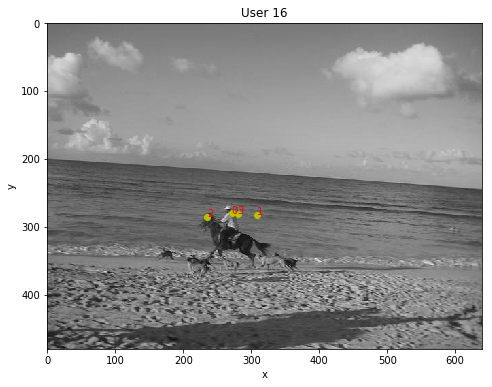

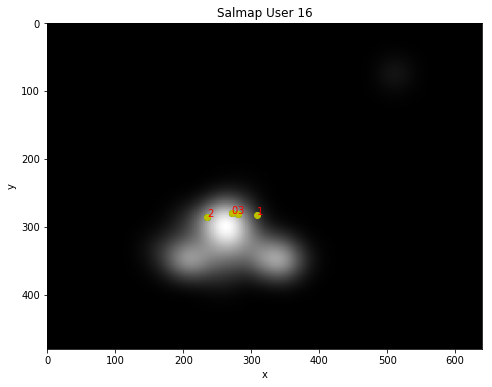

In [34]:
#Sample 1
sample = scipy.io.loadmat(TRAIN_FOLDER+ 'COCO_train2014_000000495789.mat') #1 sample#

name, fixations, locations, timestamps, size = get_image_data(sample)
img_PATH = SALICON_PATH +'%s.jpg' % name
map_PATH= TRAIN_MAPS_PATH + '%s.png' % name

plot_fixations(img_PATH,map_PATH,fixations)
#print sample.keys()


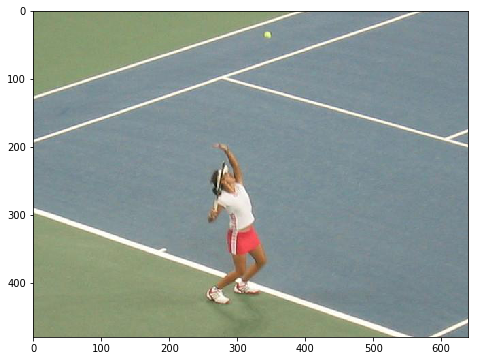

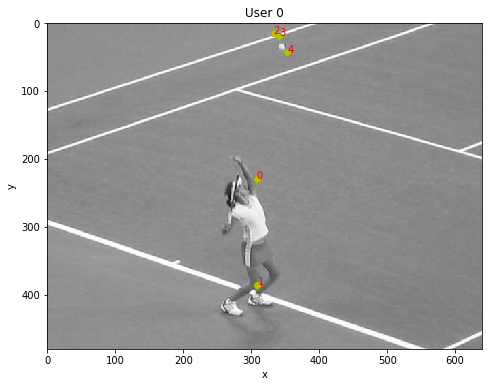

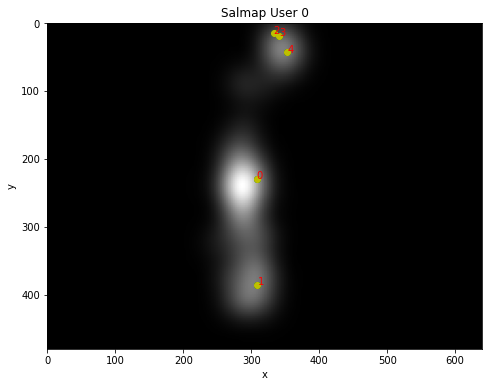

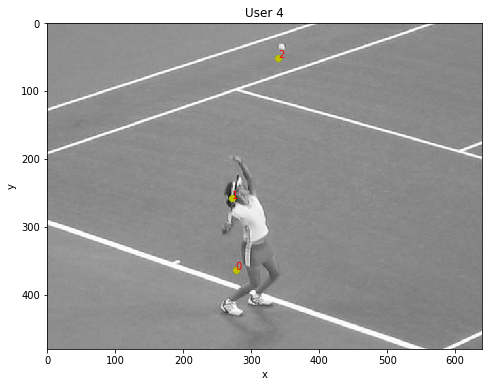

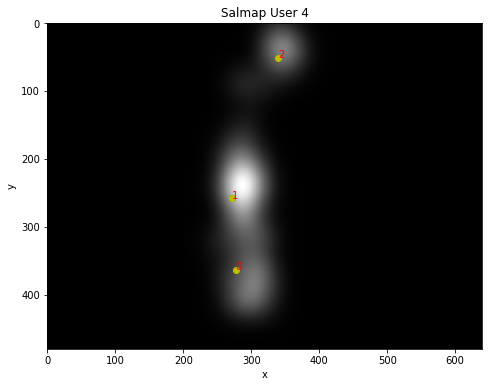

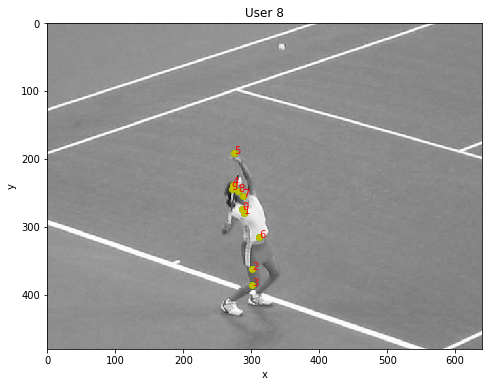

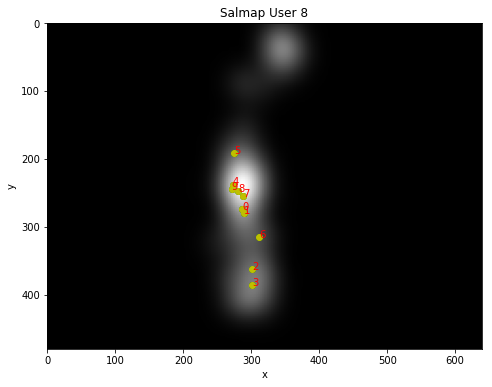

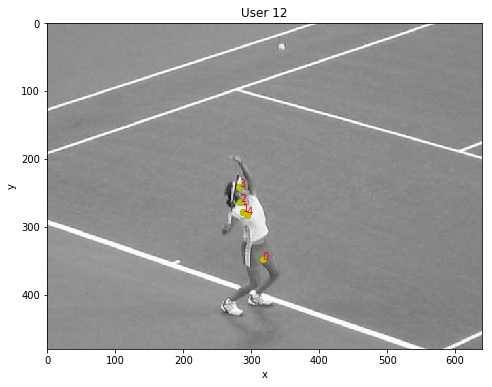

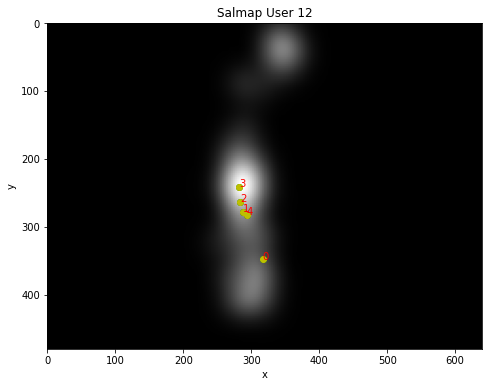

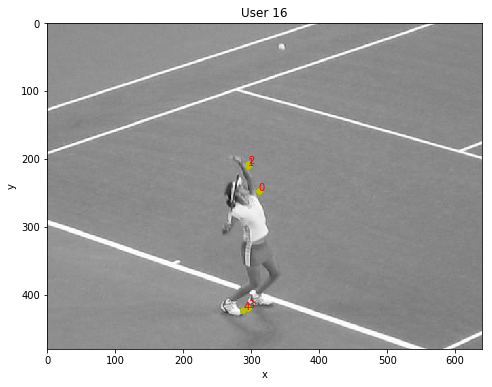

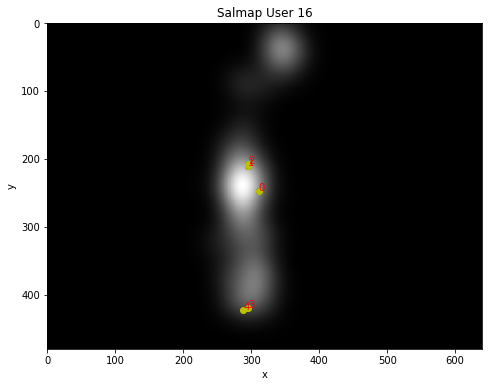

In [35]:
# Prepare data of the image

#Sample 2
sample = scipy.io.loadmat(TRAIN_FOLDER+ 'COCO_train2014_000000496434.mat') #1 sample#

name, fixations, locations, timestamps, size = get_image_data(sample)
img_PATH = SALICON_PATH +'%s.jpg' % name
map_PATH= TRAIN_MAPS_PATH + '%s.png' % name

plot_fixations(img_PATH,map_PATH,fixations)

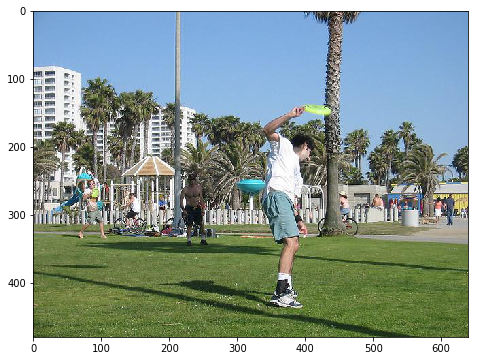

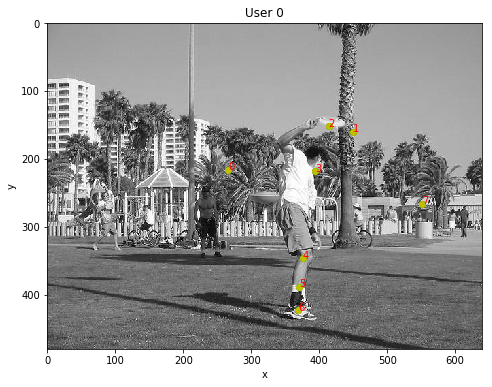

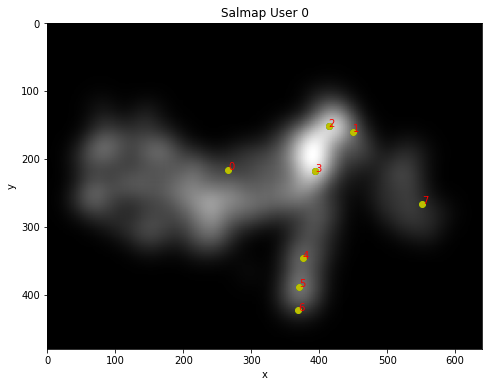

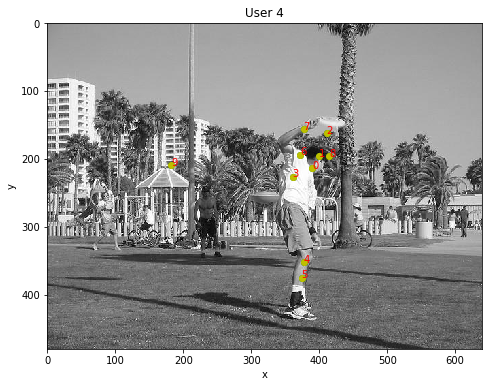

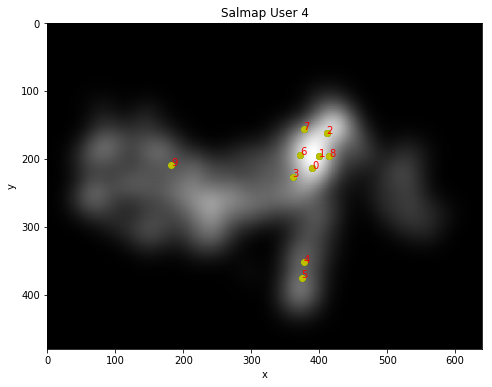

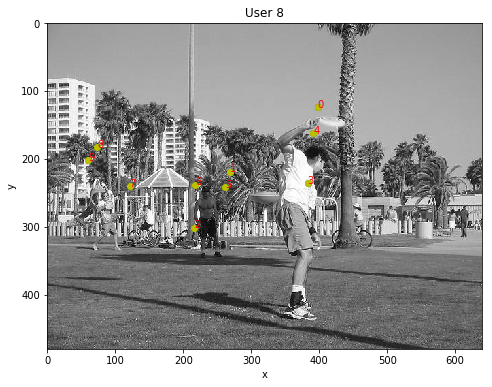

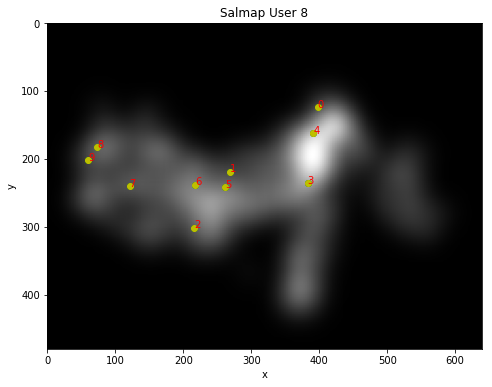

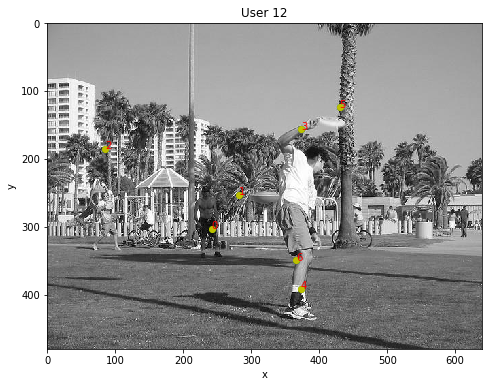

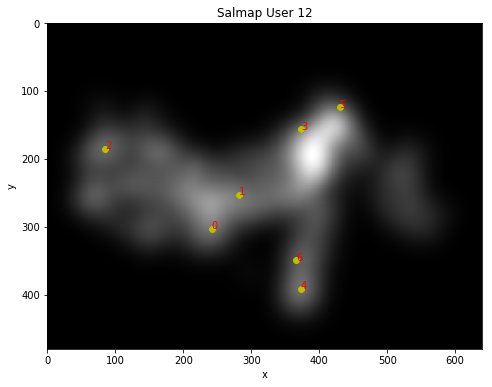

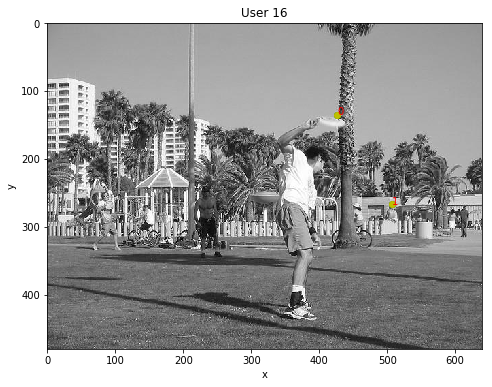

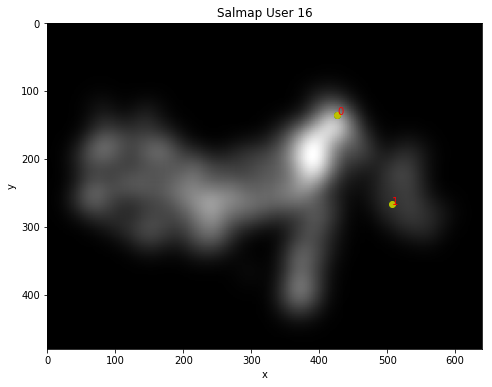

In [36]:
# Prepare data of the image

#Sample 3
sample = scipy.io.loadmat(TRAIN_FOLDER+ 'COCO_train2014_000000497216.mat') #1 sample#

name, fixations, locations, timestamps, size = get_image_data(sample)
img_PATH = SALICON_PATH +'%s.jpg' % name
map_PATH= TRAIN_MAPS_PATH + '%s.png' % name

plot_fixations(img_PATH,map_PATH,fixations)

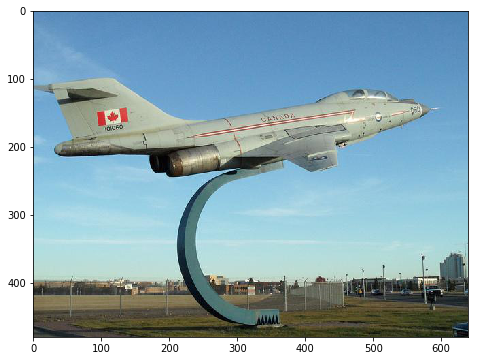

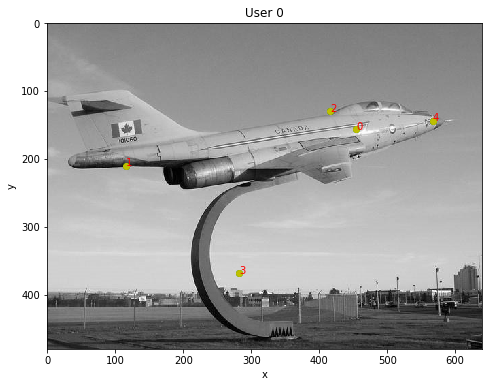

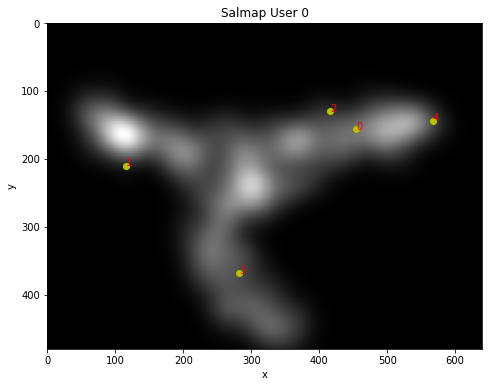

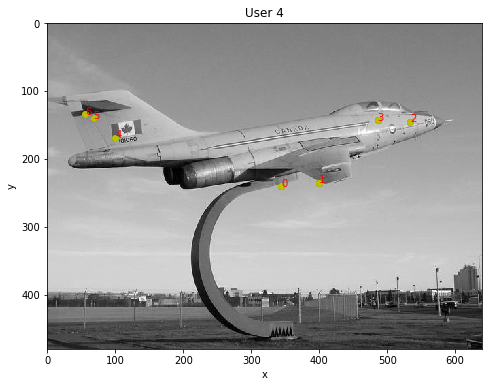

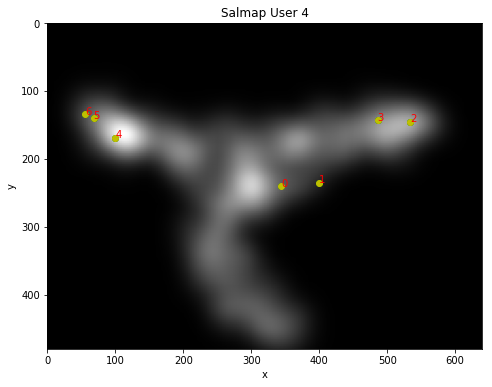

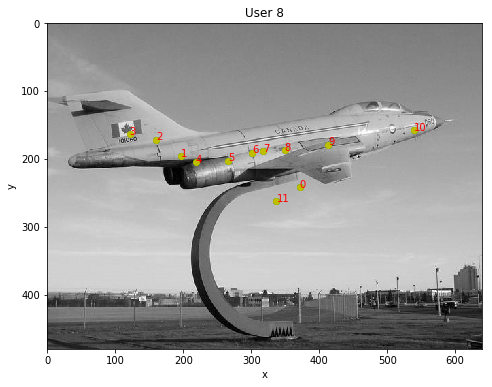

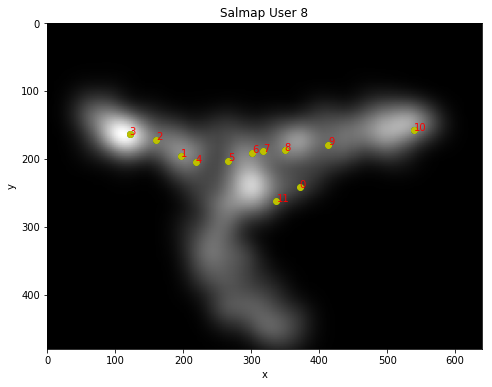

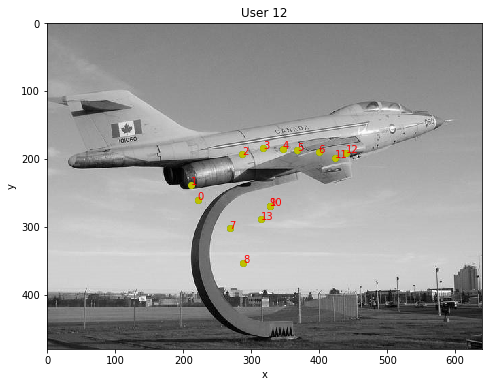

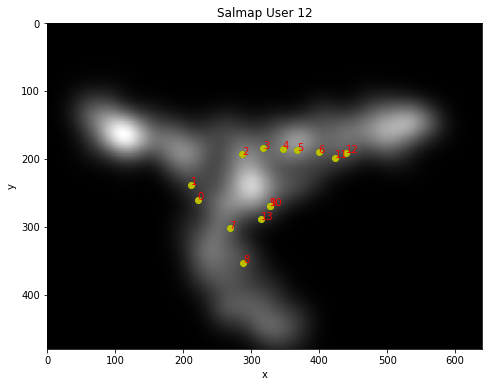

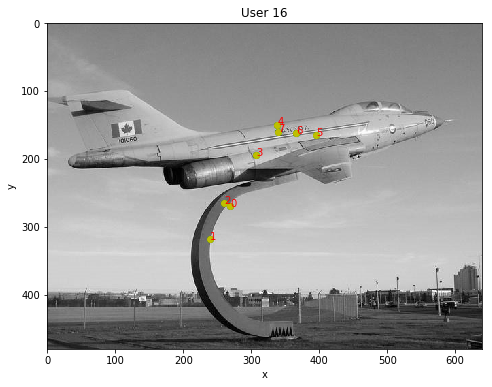

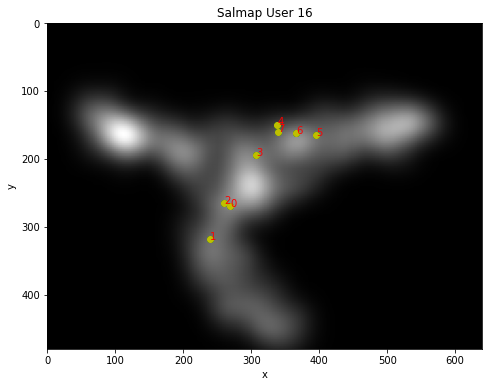

In [37]:
# Prepare data of the image

#Sample 3
sample = scipy.io.loadmat(TRAIN_FOLDER+ 'COCO_train2014_000000509406.mat') #1 sample#

name, fixations, locations, timestamps, size = get_image_data(sample)
img_PATH = SALICON_PATH +'%s.jpg' % name
map_PATH= TRAIN_MAPS_PATH + '%s.png' % name

plot_fixations(img_PATH,map_PATH,fixations)